In [16]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
g = -9.8

In [9]:
X = np.array([1.4,3.5,5.6])
Y = np.array([0.4007954931819738,0.594128102489774,0.29802795523938164])

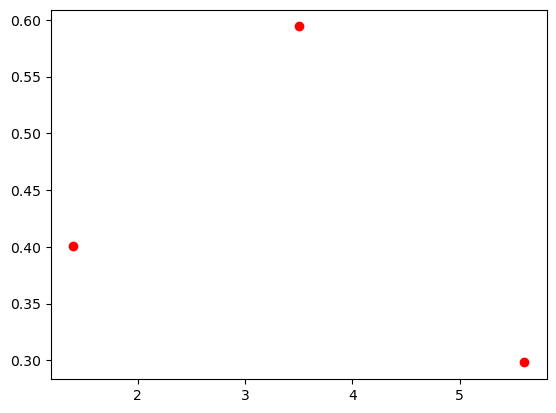

In [10]:
plt.scatter(X,Y,color='r',marker='o')

In [11]:
def Lagrange(x,xi,j):
    
    prod = 1.0
    n = len(xi)
    
    for i in range(n):
        if i != j:
            prod *= (x - xi[i])/(xi[j]-xi[i])
            
    return prod

In [12]:
def Interpolate(x,xi,yi):
    
    Sum = 0.
    n = len(xi)
    
    for j in range(n):
        Sum += yi[j]*Lagrange(x,xi,j)
        
    return Sum

In [32]:
x = np.linspace(-2,10,100)
y = Interpolate(x,X,Y)

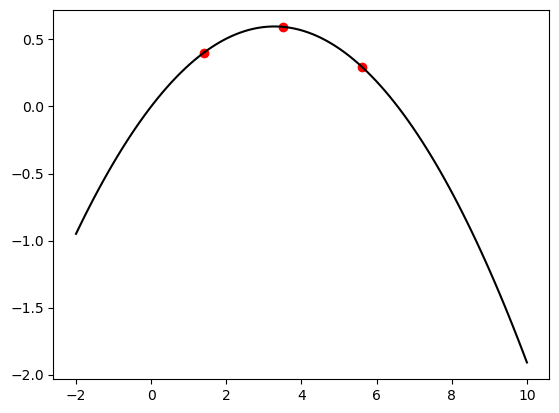

In [33]:
plt.scatter(X,Y,marker='o',color='r')
plt.plot(x,y,color='k')

In [31]:
x = sym.Symbol('x',real=True)
f = Interpolate(x,X,Y)
f = sym.simplify(f)
f

x*(0.363970234266202 - 0.0554912422401579*x)

In [27]:
df = sym.diff(f,x)
df = sym.simplify(df)
df

0.363970234266202 - 0.110982484480316*x

In [28]:
func = sym.lambdify([x],f,'numpy')
funcd = sym.lambdify([x],df,'numpy')
funcd(0)

0.363970234266202

In [36]:
thetar = np.arctan(0.363970234266202)
theta = thetar*180/np.pi
theta

19.999999999999986

In [38]:
V0 = 1/np.cos(thetar) *np.sqrt(9.8/(2*(0.0554912422401579)))
V0

10.0